In [ ]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install plotly
!pip install umap-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as UMAP
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

D:\GitHub\IBM-AI-Engineering-Professional-Certificate\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

cluster_std=[1,1,2,3.5]

X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

In [9]:
print(f"X: {X}")
print(f"Labels: {labels_}")

X: [[ 3.78092405  4.36112394  8.01763723]
 [-7.58323438  2.91653026  1.50564523]
 [ 2.95852774 11.81497385  8.47480545]
 ...
 [ 3.45353408 -6.26465683 -3.27983083]
 [ 1.0754008   9.8711247   3.67397647]
 [ 0.64496771  8.75096396  4.57655696]]
Labels: [3 2 3 2 1 1 0 1 3 0 1 1 0 3 2 1 0 0 2 3 3 2 2 3 0 2 1 2 3 0 2 1 3 1 2 2 2
 3 0 1 1 3 1 2 1 0 2 3 1 0 3 1 0 1 1 3 1 2 2 2 3 2 3 0 3 2 2 3 2 0 1 3 0 1
 0 1 2 1 2 2 3 2 1 0 1 1 1 2 0 3 0 1 1 3 2 3 2 0 3 0 1 0 1 1 1 0 0 2 2 0 2
 3 0 1 1 0 0 3 1 1 2 0 0 2 1 3 2 0 3 1 3 2 3 2 1 3 3 1 3 0 0 2 1 0 1 2 2 2
 2 1 3 0 2 1 2 0 1 2 0 3 2 2 2 2 3 1 2 0 1 0 0 0 1 2 2 2 1 1 2 0 3 2 3 2 3
 0 0 1 3 2 1 1 3 3 2 2 3 0 1 1 1 0 1 3 1 2 2 0 1 1 3 2 2 3 1 2 2 2 0 3 0 1
 2 1 0 1 2 1 0 1 2 1 3 0 2 0 0 0 1 0 3 3 3 0 3 1 0 2 2 1 3 2 0 2 1 3 3 0 0
 3 3 1 0 1 3 0 0 0 1 0 3 2 2 1 3 0 2 2 1 0 0 3 3 2 2 0 2 0 1 3 0 3 2 0 3 1
 2 1 0 3 0 2 0 3 1 3 0 3 0 2 3 3 1 0 1 2 0 3 0 0 0 0 0 3 3 0 0 1 2 1 0 0 2
 3 3 0 2 0 2 2 3 3 3 2 3 1 0 1 3 0 2 3 1 3 1 1 1 1 3 1 1 1 1 3 0 1 1 0 2 1

In [22]:
# 3D plot the data
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str), opacity=0.7, color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)
fig.show()

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82962036,  0.01649615,  0.97252647],
       [-1.39042643, -0.20878892, -0.14816274],
       [ 0.66896101,  1.1789276 ,  1.05120339],
       ...,
       [ 0.76566304, -1.64059942, -0.97172508],
       [ 0.30108248,  0.8757834 ,  0.22499887],
       [ 0.21699516,  0.7010938 ,  0.38032956]], shape=(500, 3))

In [24]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

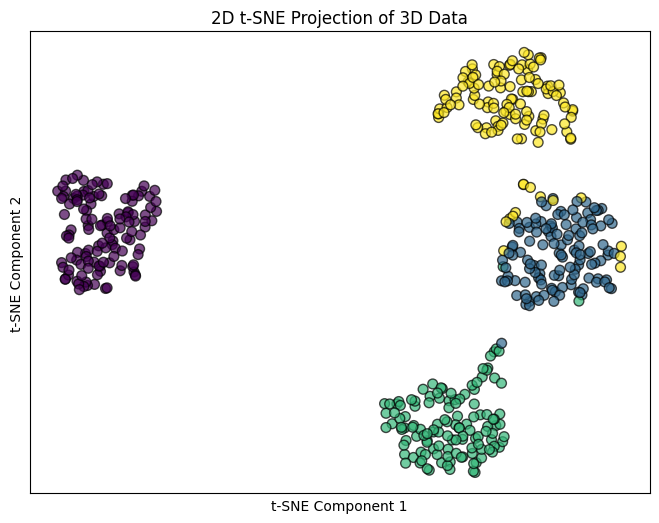

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

D:\GitHub\IBM-AI-Engineering-Professional-Certificate\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



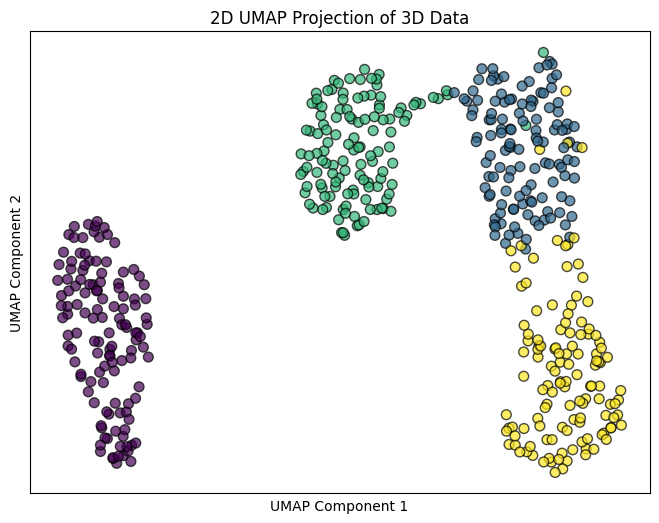

In [26]:
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()

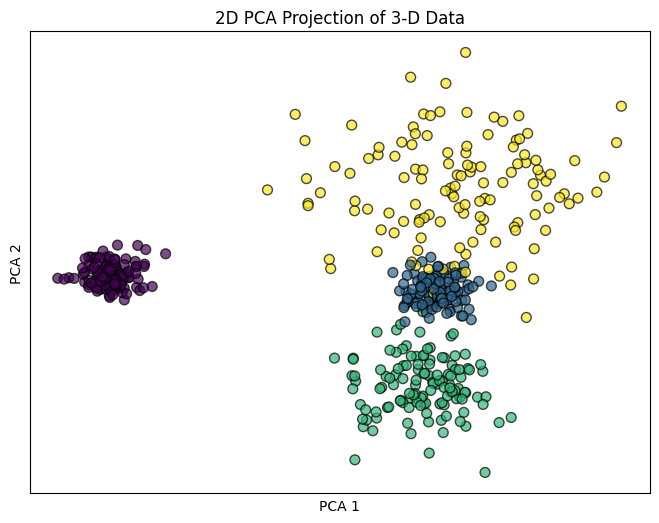

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))

ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()